# Unsupervised Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path and load data

path = r'C:\Users\31622\OneDrive\Documents\Career Foundry\Career Foundry\Exercise\Exercise 6\Airline Project'
airline_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'airline_clean.csv'), index_col = False)
airline_clean.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_to_travel,length_of_stay,flight_hour,flight_day,booking_origin,extra_baggage,preferred_seat,in_flight_meals,flight_duration,booking_complete
0,25748,1,Internet,RoundTrip,191,2,16,Thu,Afghanistan,0,0,0,4.75,0
1,47529,1,Internet,RoundTrip,27,6,2,Thu,Algeria,0,0,1,6.62,0
2,8131,1,Mobile,RoundTrip,55,29,16,Mon,Argentina,1,0,0,5.52,0
3,11022,1,Internet,RoundTrip,30,18,18,Thu,Argentina,0,1,0,8.58,0
4,11024,1,Internet,RoundTrip,30,42,20,Thu,Argentina,0,0,0,8.58,0


In [4]:
airline_clean.shape

(49918, 14)

In [5]:
airline_clean.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_to_travel,length_of_stay,flight_hour,flight_day,booking_origin,extra_baggage,preferred_seat,in_flight_meals,flight_duration,booking_complete
0,25748,1,Internet,RoundTrip,191,2,16,Thu,Afghanistan,0,0,0,4.75,0
1,47529,1,Internet,RoundTrip,27,6,2,Thu,Algeria,0,0,1,6.62,0
2,8131,1,Mobile,RoundTrip,55,29,16,Mon,Argentina,1,0,0,5.52,0
3,11022,1,Internet,RoundTrip,30,18,18,Thu,Argentina,0,1,0,8.58,0
4,11024,1,Internet,RoundTrip,30,42,20,Thu,Argentina,0,0,0,8.58,0


In [6]:
airline_clean.columns

Index(['Unnamed: 0', 'num_passengers', 'sales_channel', 'trip_type',
       'purchase_to_travel', 'length_of_stay', 'flight_hour', 'flight_day',
       'booking_origin', 'extra_baggage', 'preferred_seat', 'in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [7]:
# Drop column 'Unnamed: 0'

airline_clean = airline_clean.drop(columns = ['Unnamed: 0'])

In [8]:
# Create a subset 

airline_sub = airline_clean[['num_passengers', 'purchase_to_travel', 'length_of_stay', 'flight_hour', 'flight_duration']]

### 2. The elbow technique

In [9]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10) 

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(airline_sub).score(airline_sub) for i in range(len(kmeans))] 

score

C:\Users\31622\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\31622\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\31622\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\31622\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\31622\anaconda3\Lib\site-packages\sklearn\clust

[-467683716.29124105,
 -169261010.09585118,
 -113034734.49022226,
 -84770559.72614004,
 -62223997.22098834,
 -51270978.80385001,
 -41042563.97390627,
 -35307608.16730105,
 -31682676.90995454]

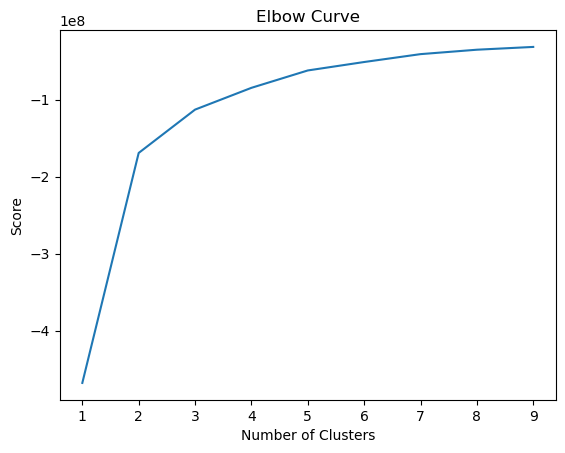

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  Our elbow curve shows a slight jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for our clusters is three.

### 3. k-means clustering

In [12]:
# Create the k-means object with 3 clusters

kmeans = KMeans(n_clusters = 3, n_init="auto") 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(airline_sub)

KMeans(n_clusters=3, n_init='auto')

In [14]:
airline_sub['clusters'] = kmeans.fit_predict(airline_sub)

C:\Users\31622\AppData\Local\Temp\ipykernel_10712\3640029971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_sub['clusters'] = kmeans.fit_predict(airline_sub)


In [15]:
airline_sub.head()

,num_passengers,purchase_to_travel,length_of_stay,flight_hour,flight_duration,clusters
0,1,191,2,16,4.75,2
1,1,27,6,2,6.62,0
2,1,55,29,16,5.52,0
3,1,30,18,18,8.58,0
4,1,30,42,20,8.58,0


In [16]:
airline_sub['clusters'].value_counts()

0    32964
2    11517
1     5437
Name: clusters, dtype: int64

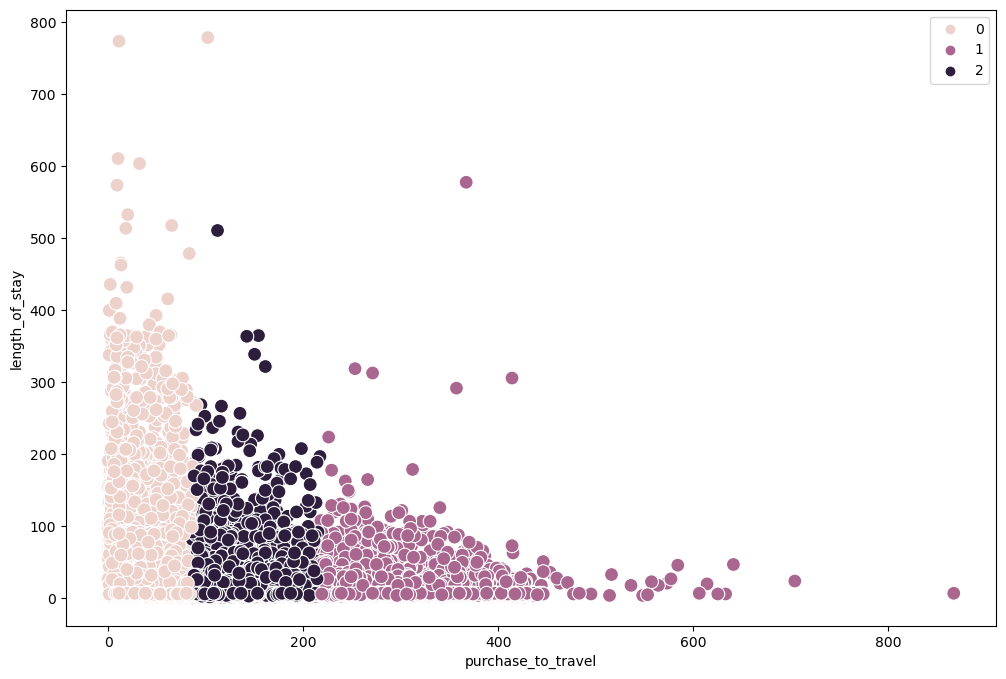

In [17]:
# Plot the clusters for the "purchase_to_travel" and "length_of_stay" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airline_sub['purchase_to_travel'], y=airline_sub['length_of_stay'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('purchase_to_travel') # Label x-axis.
plt.ylabel('length_of_stay') # Label y-axis.
plt.show()

**The findings suggest that the purple cluster generally has the highest purchase to travel time (with the exclusion of some extreme values at the top of the purchase to travel range), with shorter length of stay period and generally longer flight duration than any other clusters. On the other hand, cluster 2, then cluster O have shorter flight durations but longer length of stay and shorter purchase to travel time.**

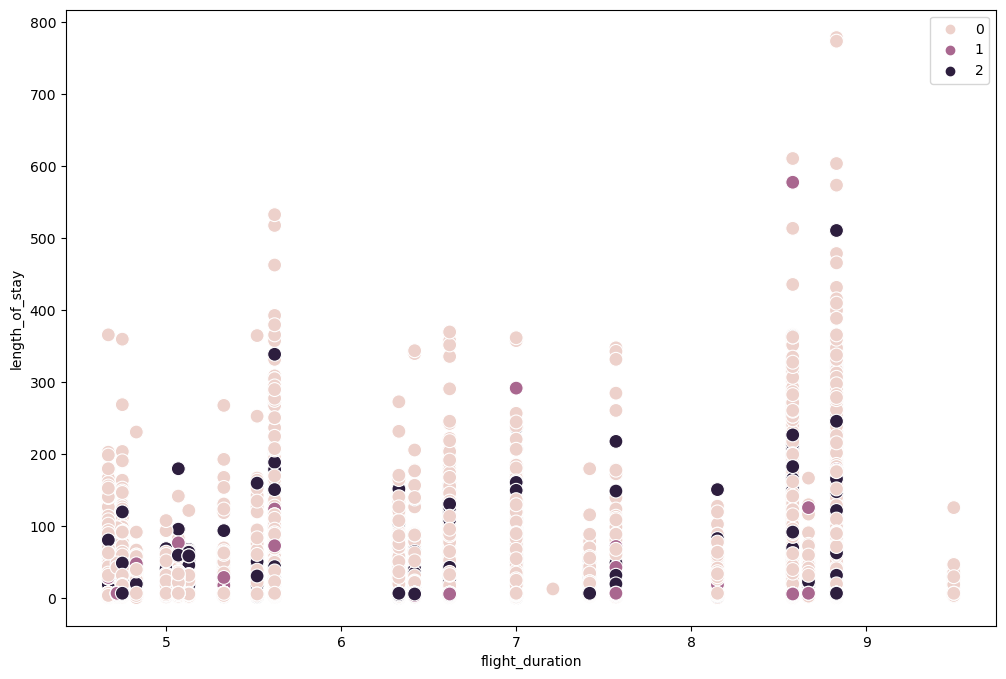

In [18]:
# Plot the clusters for the "purchase_to_travel" and "length_of_stay" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airline_sub['flight_duration'], y=airline_sub['length_of_stay'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('flight_duration')
plt.ylabel('length_of_stay') 
plt.show()

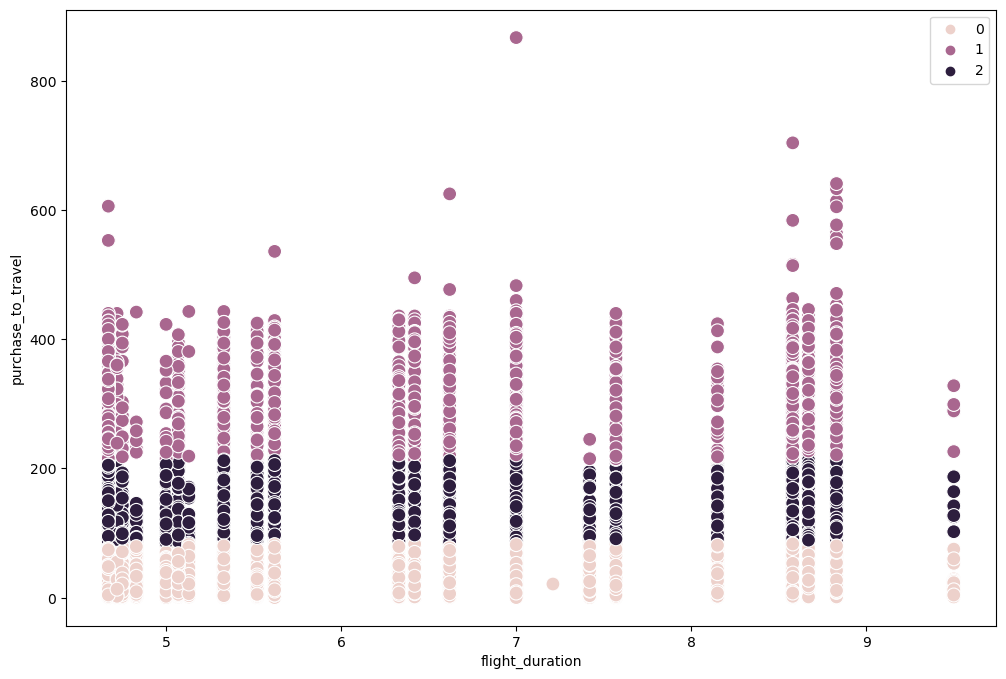

In [19]:
# Plot the clusters for the "purchase_to_travel" and "length_of_stay" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airline_sub['flight_duration'], y=airline_sub['purchase_to_travel'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('flight_duration')
plt.ylabel('purchase_to_travel') 
plt.show()

In [20]:
airline_sub.loc[airline_sub['clusters'] == 2, 'cluster'] = 'dark purple'
airline_sub.loc[airline_sub['clusters'] == 1, 'cluster'] = 'purple'
airline_sub.loc[airline_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\31622\AppData\Local\Temp\ipykernel_10712\4251267163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_sub.loc[airline_sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [21]:
airline_sub.groupby('cluster').agg({'purchase_to_travel':['mean', 'median'], 
                         'length_of_stay':['mean', 'median'], 
                         'flight_duration':['mean', 'median'],
                          'flight_hour':['mean', 'median']})

purchase_to_travel        length_of_stay        flight_duration  \
                          mean median           mean median            mean   
cluster                                                                       
dark purple         134.646349  127.0      21.742207   18.0        7.408319   
pink                 33.122406   29.0      24.516958   17.0        7.205288   
purple              293.894979  280.0      16.970388    6.0        7.448126   

                   flight_hour         
            median        mean median  
cluster                                
dark purple   7.57    9.195277    9.0  
pink          7.00    8.958015    9.0  
purple        7.57    9.461836    9.0

**Conclusions**

**Based on these statistics, it appears that our mean for our purchase to travel shows a converse effect with our length of stay average. What we see is that, our highest average purchase to travel time relates to the shortest length of stay average. The flight duration does not seem to have an impact, as the mean remains roughly the same for all clusters.**

**There are a limited number of columns, not enough to provide more insights into our data set.This would have provided a more comprehensive and accurate conclusions.**

### What could these results be useful for?

**The findings can help better understand the characteristics of each cluster and in understanding the relationship between variables. From this analysis, i have confirmed that there is a relationship between purchase to travel and length of stay but not my hypothesis - The longer the purchase to travel time, the longer the length of stay. I found out that passengers are willing to wait longer for their holidays but that is not because they want to have a longer stay, quite the opposite. I would like to further explore this, as i believe from my analysis so far that the geographical aspect play a role in this dynamic.**


In [22]:
# Export the dataframe to csv file

airline_clean.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'airline_clean.csv'))
airline_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'airline_clusters.csv'))